In [21]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x = np.array([[1]])
y = x

In [6]:
n = 20
backend = Aer.get_backend('qasm_simulator')

grad_list_width = []
for i in tqdm(range(3, 20)):
    grad = 0
    for j in tqdm(range(n), leave=False):    
        np.random.seed(42 + j)
        network = sequential([1, i, 1], backend)
        network.backward(x, y)

        grad += np.mean(np.abs(network.weight_gradient_list[0]))
    
    grad /= n
    grad_list_width.append(grad)

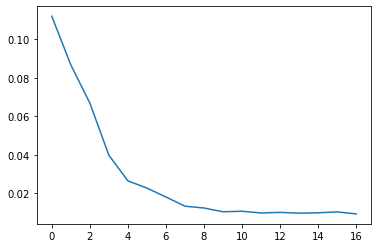

In [22]:
plt.plot(grad_list_width)
plt.show()

In [24]:
n = 100
backend = Aer.get_backend('qasm_simulator')

grad_list_depth = []
for i in tqdm(range(1, 7)):
    grad = 0
    dim = [1] + i*[4] + [1]
    for j in tqdm(range(n), leave=False):
        np.random.seed(42 + j)
        network = sequential(dim, backend, shots=10000)
        network.backward(x, y)

        grad += np.mean(np.abs(network.weight_gradient_list[0]))
    
    grad /= n
    grad_list_depth.append(grad)

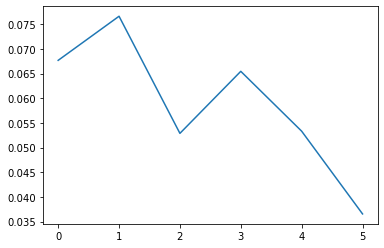

In [25]:
plt.plot(grad_list_depth)
plt.show()